<a href="https://colab.research.google.com/github/SHESHAL01/ML_CW_2425422/blob/main/ML_CW_2425422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# TASK 01
file_path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Course Work/WA_Fn-UseC_-Telco-Customer-Churn.csv"
dataSet = pd.read_csv(file_path)

In [4]:
# Data set overview
print("\nColumn Names:\n", dataSet.columns.tolist())

print("\nData Types of Columns:")
print(dataSet.dtypes)

print("\nSample Rows:")
print(dataSet.head())

print("Shape of The Data Set:", dataSet.shape)


Column Names:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Types of Columns:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Sample Rows:
   customerID  gende

In [5]:
#Missing value Analysis
print('\nNumber of Unique values in each column:\n')
print(dataSet.nunique())

print('\nNumber of null values in each column:\n')
print(dataSet.isnull().sum())

# Check for empty strings in TotalCharges
print("\nUnique values in TotalCharges:", dataSet["TotalCharges"].unique()[:10])

# Convert TotalCharges to numeric (fixes missing/invalid values)
dataSet["TotalCharges"] = pd.to_numeric(dataSet["TotalCharges"], errors="coerce")

# Check new missing values after conversion
print("\nMissing after conversion:", dataSet["TotalCharges"].isna().sum())


Number of Unique values in each column:

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Number of null values in each column:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
Paymen

In [6]:
#Summary Statistics
print('\nSummery for Numerical Data:')
print(dataSet.describe())

print('\nSummery for Categorical Data:')
print(dataSet.describe(include='object'))


Summery for Numerical Data:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Summery for Categorical Data:
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361       

/tmp/ipython-input-1723453604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=dataSet, palette="Blues")


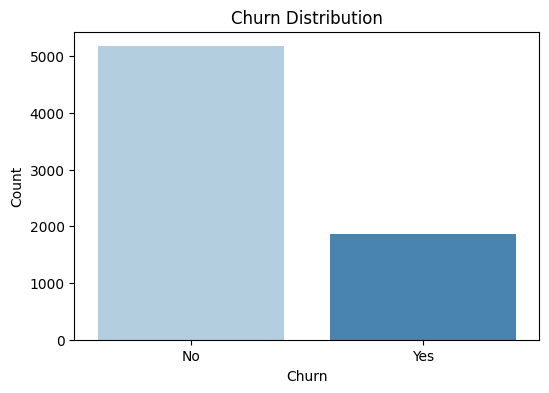


Class distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [7]:
#Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=dataSet, palette="Blues")
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

print("\nClass distribution:")
print(dataSet["Churn"].value_counts())
print(dataSet["Churn"].value_counts(normalize=True))

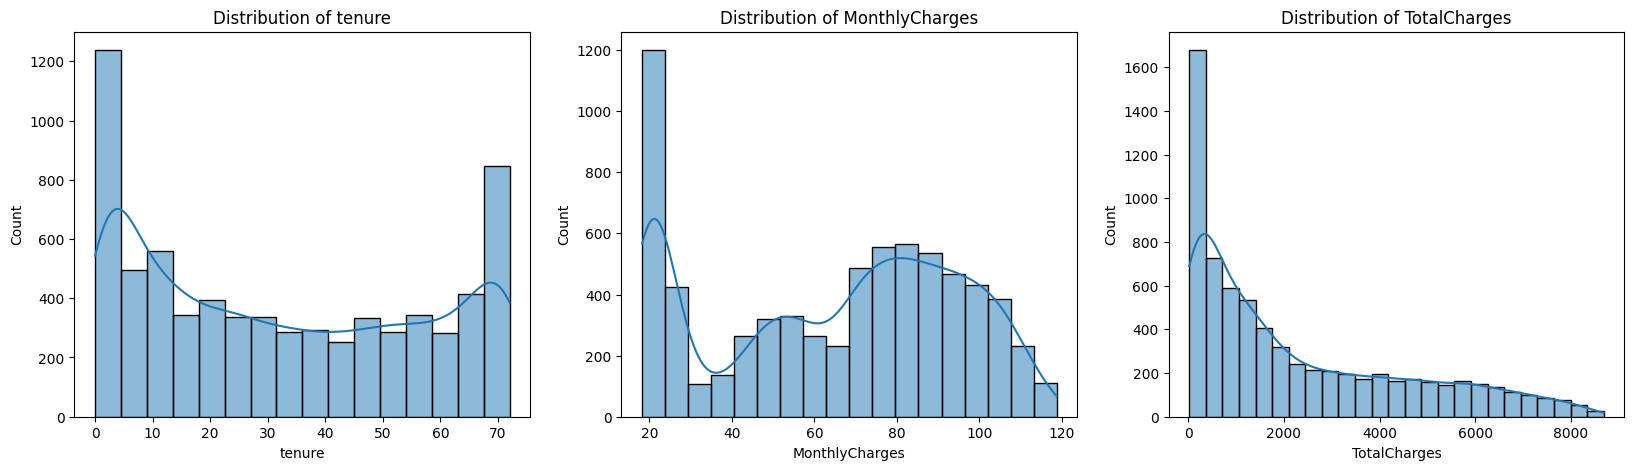

In [8]:
#Numerical Feature Visualisation
numeric_columns = ['tenure','MonthlyCharges','TotalCharges']

plt.figure(figsize=(20,5))
for col in numeric_columns:
    plt.subplot(1,3,numeric_columns.index(col)+1)
    sns.histplot(dataSet[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
plt.show()



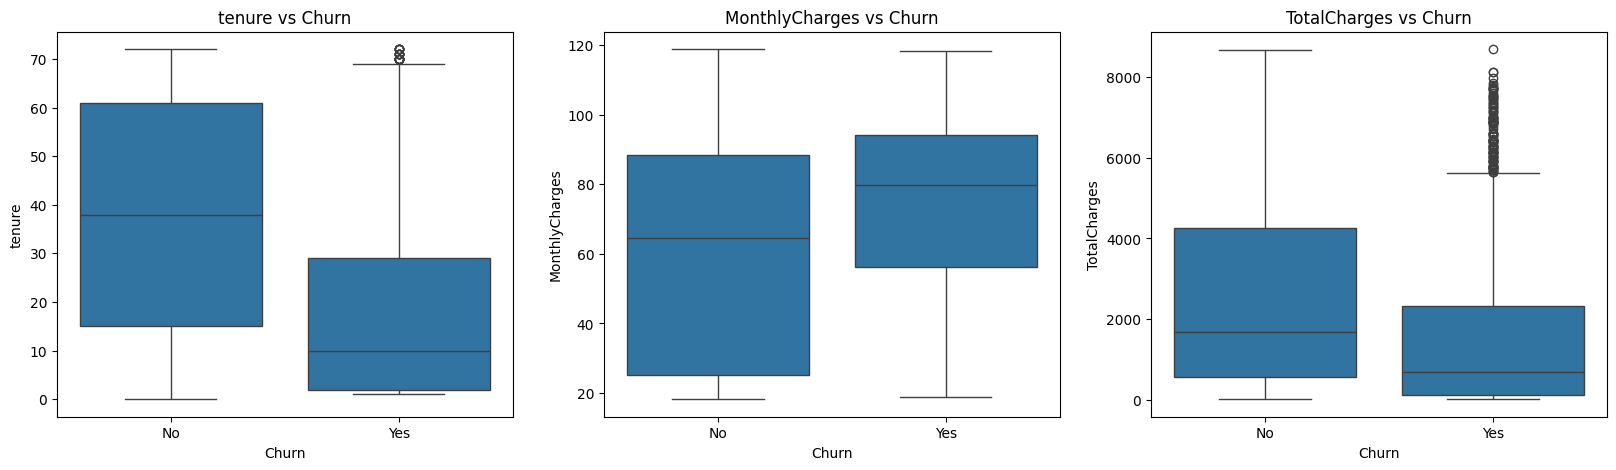

In [9]:

plt.figure(figsize=(20,5))
for col in numeric_columns:
    plt.subplot(1,3,numeric_columns.index(col)+1)
    sns.boxplot(data=dataSet, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
# plt.savefig("my_plot33.png")
# files.download("my_plot33.png")
plt.show()

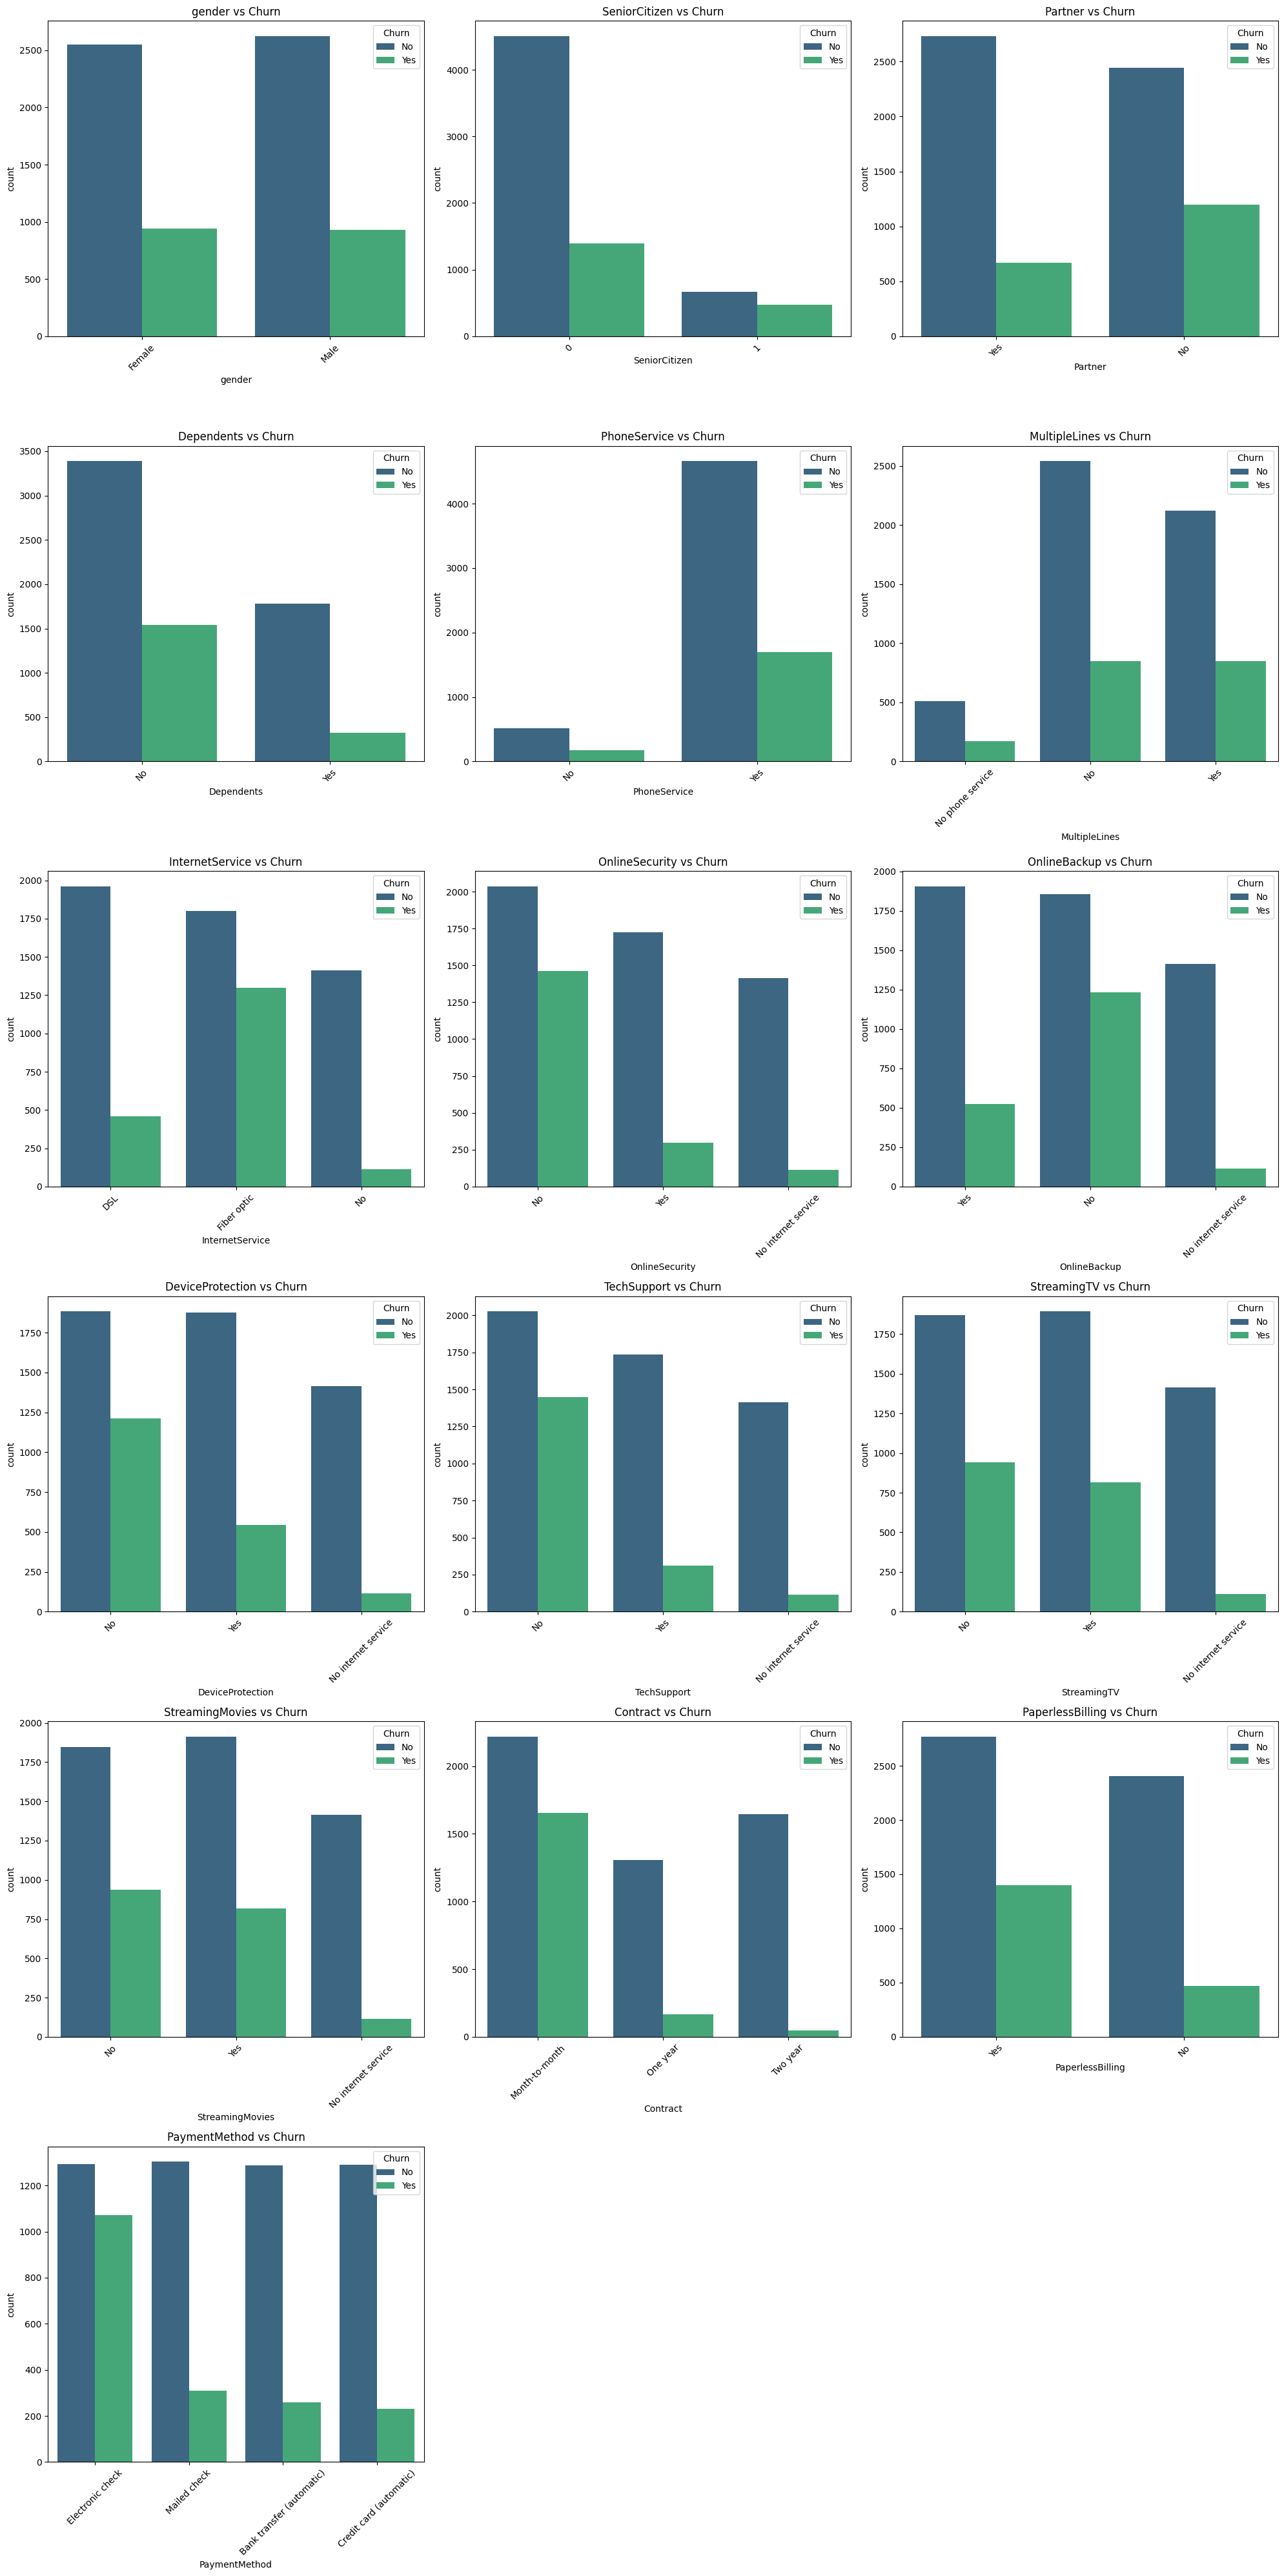

In [10]:
#Categorical Feature visualization
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
plt.figure(figsize=(20, 40))
for col in categorical_columns:
    plt.subplot(6,3,categorical_columns.index(col)+1)
    sns.countplot(x=col, data=dataSet,hue="Churn", palette= 'viridis',) # Added palette here
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("my_plotcccc.png")
# files.download("my_plotcccc.png")
plt.show()

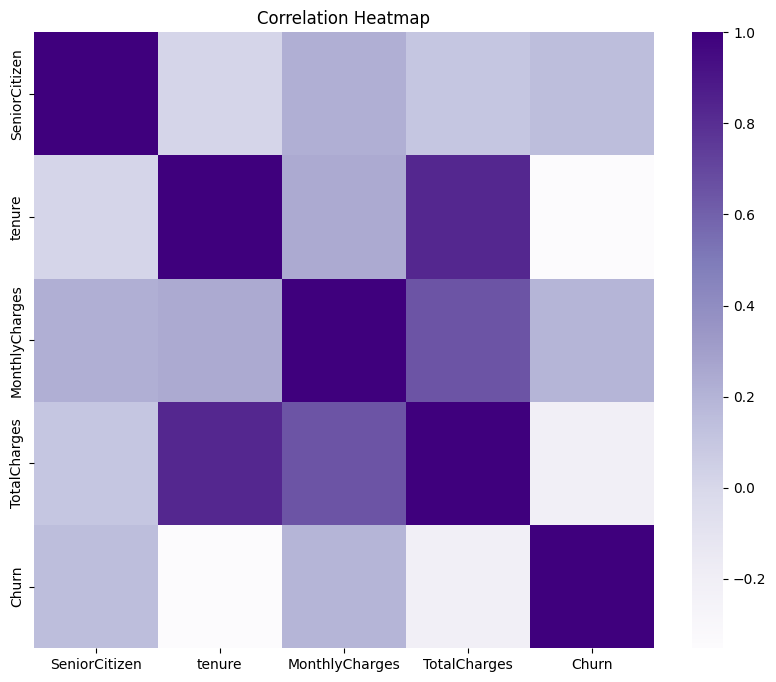

In [11]:
#Correlation Heat Map
dataSet['Churn'] = dataSet['Churn'].str.strip().map({'Yes': 1, 'No': 0})
corr_matrix = dataSet.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='Purples')
plt.title('Correlation Heatmap')
# plt.savefig("my_plotlll.png")
# files.download("my_plotlll.png")
plt.show()

In [12]:
#TASK 02
#Preproccessing

#Fixing Total Charges
dataSet["TotalCharges"] = pd.to_numeric(dataSet["TotalCharges"], errors="coerce")
dataSet["TotalCharges"].fillna(dataSet["TotalCharges"].median(), inplace=True)

dataSet.drop(columns=["customerID"], inplace=True)

/tmp/ipython-input-2623705103.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataSet["TotalCharges"].fillna(dataSet["TotalCharges"].median(), inplace=True)


In [13]:
#Encoding Yes & No to 1,0
binary_cols = ["Partner","Dependents","PhoneService","PaperlessBilling"]

for col in binary_cols:
    dataSet[col] = dataSet[col].str.strip().map({"Yes":1,"No":0})

In [14]:
#Replace No internet service and no phone service with "No"
replace_cols = ["MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

for col in replace_cols:
    dataSet[col] = dataSet[col].replace({"No internet service":"No", "No phone service":"No"})

In [15]:
#encoding categorical features

# Identify numerical and categorical columns from the dataset's current state.
num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen",
            "Partner", "Dependents", "PhoneService", "PaperlessBilling"]

# These are the remaining object-type categorical columns
cat_cols = ["gender","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
            "TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]

# Create a copy of the dataset to apply one-hot encoding
dataSet_encoded = dataSet.copy()

# Apply one-hot encoding to the remaining categorical columns
dataSet_encoded = pd.get_dummies(dataSet_encoded, columns=cat_cols, drop_first=True)

In [16]:
#Split dataset to train and test
X = dataSet_encoded.drop('Churn', axis=1).drop('gender_Male',axis=1)
y = dataSet_encoded['Churn']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Manual standardization
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("Y_train shape:",y_train.shape)
print("Y_test shape:",y_test.shape)

X_train shape: (5634, 22)
X_test shape: (1409, 22)
Y_train shape: (5634,)
Y_test shape: (1409,)


In [17]:
#Confusion Matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    # plt.savefig("my_plotcnfm.png")
    # files.download("my_plotcnfm.png")
    plt.show()

In [18]:
#ROC-AUC score
def get_auc(y_test, y_prob):
    return roc_auc_score(y_test, y_prob)

DT BEFORE TUNING:
Accuracy: 0.7019162526614621
Precision: 0.4376657824933687
Recall: 0.44235924932975873
F1: 0.44
Decision Tree (Before Tuning) AUC: 0.6207145962507894


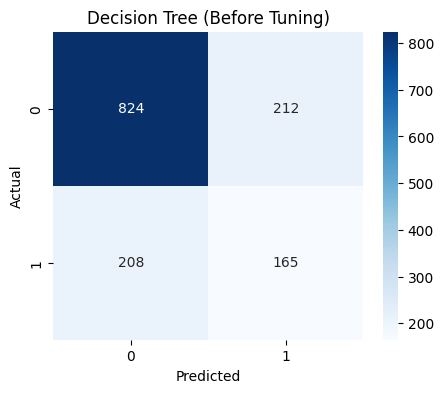

In [19]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
prob_dt = dt.predict_proba(X_test)[:, 1]

auc_dt = get_auc(y_test, prob_dt)

print("DT BEFORE TUNING:")
print("Accuracy:", accuracy_score(y_test, pred_dt))
print("Precision:", precision_score(y_test, pred_dt))
print("Recall:", recall_score(y_test, pred_dt))
print("F1:", f1_score(y_test, pred_dt))
print("Decision Tree (Before Tuning) AUC:", auc_dt)

plot_conf_matrix(y_test, pred_dt, "Decision Tree (Before Tuning)")

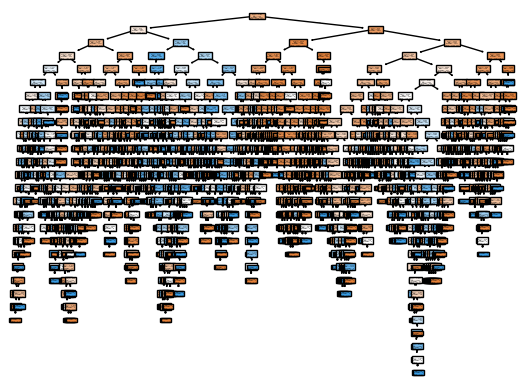

In [20]:
tree.plot_tree(dt, filled=True)
# plt.savefig("my_plotdt.png")
# files.download("my_plotdt.png")
plt.show()

DT AFTER TUNING:
Accuracy: 0.7977288857345636
Precision: 0.7115384615384616
Recall: 0.3967828418230563
F1: 0.5094664371772806
Decision Tree (After Tuning) AUC: 0.8375104806069954


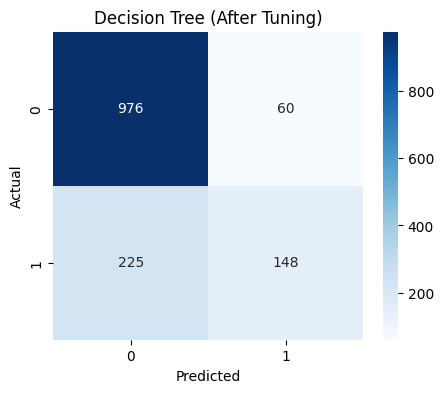

In [21]:
#Decision Tree Model
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    random_state=42
)

dt_model.fit(X_train, y_train)
pred_dt_tuned = dt_model.predict(X_test)
auc_dt_tuned = get_auc(y_test, dt_model.predict_proba(X_test)[:,1])

print("DT AFTER TUNING:")
print("Accuracy:", accuracy_score(y_test, pred_dt_tuned))
print("Precision:", precision_score(y_test, pred_dt_tuned))
print("Recall:", recall_score(y_test, pred_dt_tuned))
print("F1:", f1_score(y_test, pred_dt_tuned))
print("Decision Tree (After Tuning) AUC:", auc_dt_tuned)

plot_conf_matrix(y_test, pred_dt_tuned, "Decision Tree (After Tuning)")

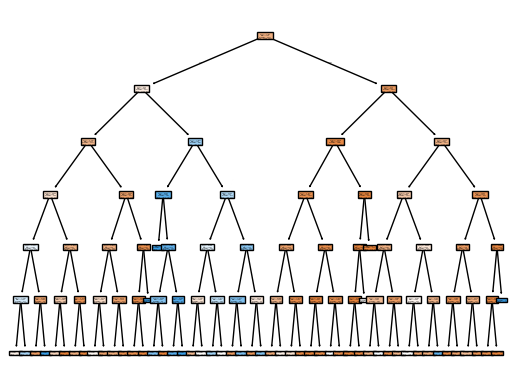

In [22]:
tree.plot_tree(dt_model, filled=True)
# plt.savefig("my_plotdt2.png")
# files.download("my_plotdt2.png")
plt.show()

Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7388 - loss: 0.5322 - val_accuracy: 0.8048 - val_loss: 0.4153
Epoch 2/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.4346 - val_accuracy: 0.8070 - val_loss: 0.4074
Epoch 3/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.4244 - val_accuracy: 0.8077 - val_loss: 0.4044
Epoch 4/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.4225 - val_accuracy: 0.8077 - val_loss: 0.4046
Epoch 5/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4153 - val_accuracy: 0.8155 - val_loss: 0.4033
Epoch 6/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8034 - loss: 0.4206 - val_accuracy: 0.8112 - val_loss: 0.4044
Epoch 7/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8079 - loss: 0.4090 - val_accuracy: 0.8112 - val_loss: 0.4051
Epoch 8/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8179 - loss: 0.3978 - val_accuracy: 0.8112 - val_

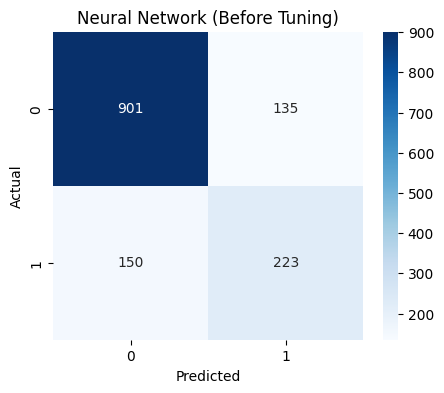

In [23]:
# BEFORE TUNING
nn_model_basic = Sequential()

nn_model_basic.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],)))
nn_model_basic.add(Dense(16, activation="relu"))
nn_model_basic.add(Dense(1, activation="sigmoid"))

nn_model_basic.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_basic = nn_model_basic.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size=32,
    verbose=1
)

# Evaluate
pred_basic = (nn_model_basic.predict(X_test) > 0.5).astype(int)

auc_nn = get_auc(y_test, nn_model_basic.predict(X_test).ravel())

print("NN BEFORE TUNING:")
print("Accuracy:", accuracy_score(y_test, pred_basic))
print("Precision:", precision_score(y_test, pred_basic))
print("Recall:", recall_score(y_test, pred_basic))
print("F1:", f1_score(y_test, pred_basic))
print("Neural Network (Before Tuning) AUC:", auc_nn)

plot_conf_matrix(y_test, pred_basic, "Neural Network (Before Tuning)")

Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6866 - loss: 0.5910 - val_accuracy: 0.7800 - val_loss: 0.4472
Epoch 2/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7707 - loss: 0.4657 - val_accuracy: 0.8041 - val_loss: 0.4162
Epoch 3/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7849 - loss: 0.4465 - val_accuracy: 0.8048 - val_loss: 0.4102
Epoch 4/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7864 - loss: 0.4468 - val_accuracy: 0.8077 - val_loss: 0.4079
Epoch 5/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7978 - loss: 0.4303 - val_accuracy: 0.8084 - val_loss: 0.4065
Epoch 6/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7893 - loss: 0.4333 - val_accuracy: 0.8119 - val_loss: 0.4060
Epoch 7/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7807 - loss: 0.4420 - val_accuracy: 0.8141 - val_loss: 0.4048
Epoch 8/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7967 - loss: 0.4330 - val_accuracy: 0.8148 - val_

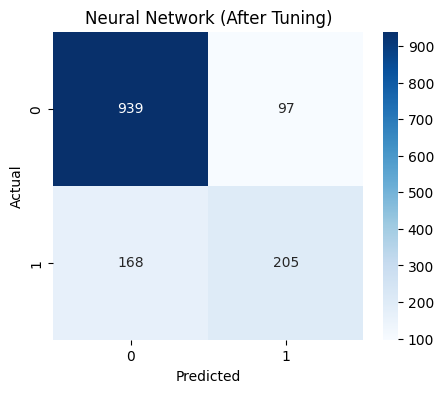

In [24]:
# AFTER TUNING
nn_model_tuned = Sequential()

nn_model_tuned.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
nn_model_tuned.add(Dropout(0.2))

nn_model_tuned.add(Dense(32, activation="relu"))
nn_model_tuned.add(Dropout(0.2))

nn_model_tuned.add(Dense(16, activation="relu"))
nn_model_tuned.add(Dropout(0.1))

nn_model_tuned.add(Dense(1, activation="sigmoid"))

nn_model_tuned.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_tuned = nn_model_tuned.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=60,
    batch_size=32,
    verbose=1
)

# Evaluate
pred_tuned = (nn_model_tuned.predict(X_test) > 0.5).astype(int)
auc_nn_tuned = get_auc(y_test, nn_model_tuned.predict(X_test).ravel())

print("NN AFTER TUNING:")
print("Accuracy:", accuracy_score(y_test, pred_tuned))
print("Precision:", precision_score(y_test, pred_tuned))
print("Recall:", recall_score(y_test, pred_tuned))
print("F1:", f1_score(y_test, pred_tuned))
print("Neural Network (After Tuning) AUC:", auc_nn_tuned)

plot_conf_matrix(y_test, pred_tuned, "Neural Network (After Tuning)")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

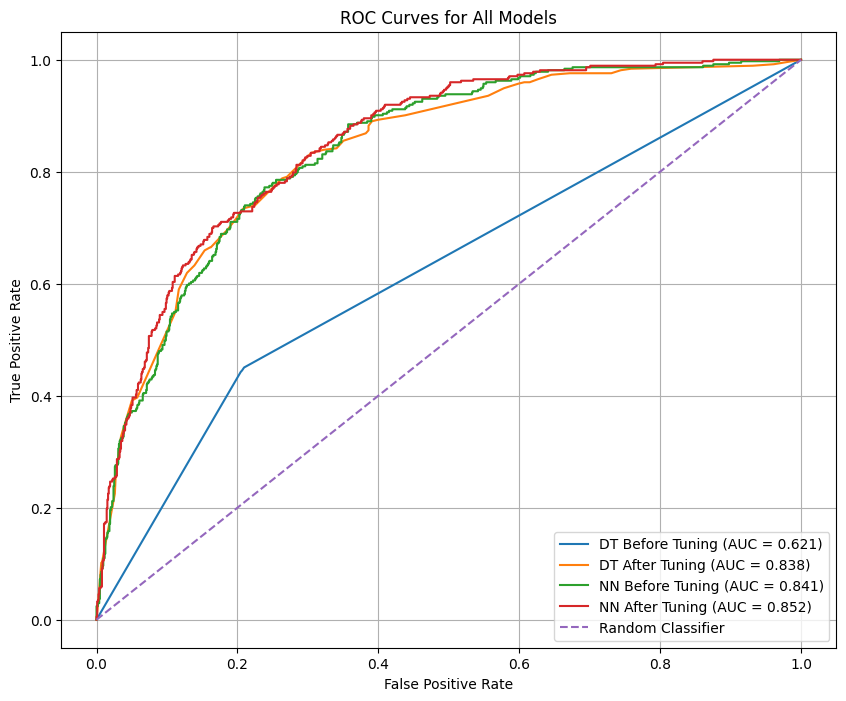

In [28]:
# ROC-AUC score curves
# --- Probabilities ---
y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_prob_dt_tuned = dt_model.predict_proba(X_test)[:, 1]
y_prob_nn = nn_model_basic.predict(X_test).ravel()
y_prob_nn_tuned = nn_model_tuned.predict(X_test).ravel()

# --- ROC Curves ---
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_dt_tuned, tpr_dt_tuned, _ = roc_curve(y_test, y_prob_dt_tuned)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
fpr_nn_tuned, tpr_nn_tuned, _ = roc_curve(y_test, y_prob_nn_tuned)

# --- AUC Scores ---
auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_dt_tuned = roc_auc_score(y_test, y_prob_dt_tuned)
auc_nn = roc_auc_score(y_test, y_prob_nn)
auc_nn_tuned = roc_auc_score(y_test, y_prob_nn_tuned)

# --- Plot Combined ROC ---
plt.figure(figsize=(10, 8))

plt.plot(fpr_dt, tpr_dt, label=f"DT Before Tuning (AUC = {auc_dt:.3f})")
plt.plot(fpr_dt_tuned, tpr_dt_tuned, label=f"DT After Tuning (AUC = {auc_dt_tuned:.3f})")
plt.plot(fpr_nn, tpr_nn, label=f"NN Before Tuning (AUC = {auc_nn:.3f})")
plt.plot(fpr_nn_tuned, tpr_nn_tuned, label=f"NN After Tuning (AUC = {auc_nn_tuned:.3f})")

plt.plot([0,1], [0,1], '--', label="Random Classifier")

plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.savefig("my_plotcnfm.png")
files.download("my_plotcnfm.png")
plt.show()

In [27]:
# DECISION TREE ACCURACY
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

# NEURAL NETWORK ACCURACY
nn_loss, nn_acc = nn_model_tuned.evaluate(X_test, y_test, verbose=0)

print("\n--- Accuracy Comparison ---")
print(f"Decision Tree Accuracy       : {dt_acc:.4f}")
print(f"Optimized Neural Network Acc : {nn_acc:.4f}")



--- Accuracy Comparison ---
Decision Tree Accuracy       : 0.7977
Optimized Neural Network Acc : 0.8119
